In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_excel("FIFA21.xlsx")
print("Dataset shape:", df.shape)

df_top = df.sort_values(by='overall', ascending=False).head(300)
print("Top 300 players shape:", df_top.shape)

Dataset shape: (18944, 106)
Top 300 players shape: (300, 106)


In [5]:
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df_features = df_top[features].dropna()

print("Selected features shape:", df_features.shape)

Selected features shape: (250, 6)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['name'] = df_top['short_name'].values[:len(df_pca)]
df_pca['overall'] = df_top['overall'].values[:len(df_pca)]
df_pca['value_eur'] = df_top['value_eur'].values[:len(df_pca)]
df_pca['position'] = df_top['player_positions'].values[:len(df_pca)]

print("Explained variance ratio:", pca.explained_variance_ratio_)
df_pca.head()

Explained variance ratio: [0.57179296 0.17776786]


,PC1,PC2,name,overall,value_eur,position
0,3.612443,-0.500136,L. Messi,93,67500000,"RW, ST, CF"
1,2.390849,0.603965,Cristiano Ronaldo,92,46000000,"ST, LW"
2,1.644621,-1.617004,K. De Bruyne,91,87000000,"CAM, CM"
3,3.513825,0.462379,Neymar Jr,91,90000000,"LW, CAM"
4,1.224171,0.043785,R. Lewandowski,91,80000000,ST


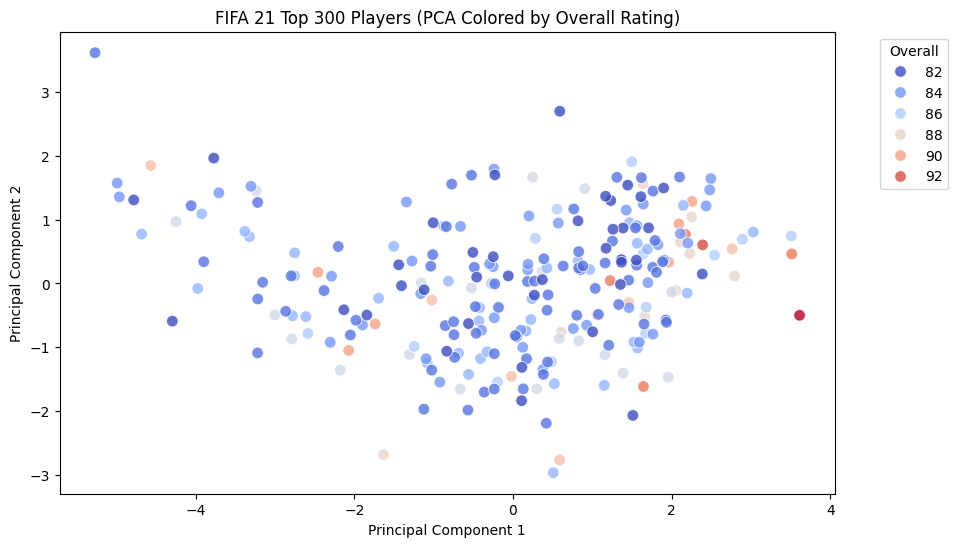

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2',
                hue='overall', palette='coolwarm', s=70, alpha=0.8)
plt.title("FIFA 21 Top 300 Players (PCA Colored by Overall Rating)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Overall', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [9]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=features)
print("Feature Contributions to Each Principal Component:\n")
display(loadings)

Feature Contributions to Each Principal Component:



,PC1,PC2
pace,0.274119,0.692209
shooting,0.462075,-0.151707
passing,0.376854,-0.609367
dribbling,0.502200,-0.109429
defending,-0.431382,-0.333336
physic,-0.361982,-0.058444


In [10]:
player_name = input("Enter player's name: ")

target = df_pca[df_pca['name'] == player_name][['PC1', 'PC2']].values

if len(target) == 0:
    print("Player not found, retry")
else:

    df_pca['distance'] = np.sqrt(((df_pca[['PC1', 'PC2']] - target) ** 2).sum(axis=1))

    similar_players = (
        df_pca[df_pca['name'] != player_name]
        .nsmallest(5, 'distance')[['name', 'overall', 'position', 'distance']]
    )

    print(f"Top 5 Players Similar to {player_name} (Based on PCA):")
    display(similar_players)


Enter player's name: L. Messi
Top 5 Players Similar to L. Messi (Based on PCA):


,name,overall,position,distance
3,Neymar Jr,91,"LW, CAM",0.967555
19,E. Hazard,88,"LW, ST",1.024389
57,R. Varane,86,CB,1.247868
14,T. Courtois,89,GK,1.345537
246,Willian,82,"RW, LW, RM",1.386766
